In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

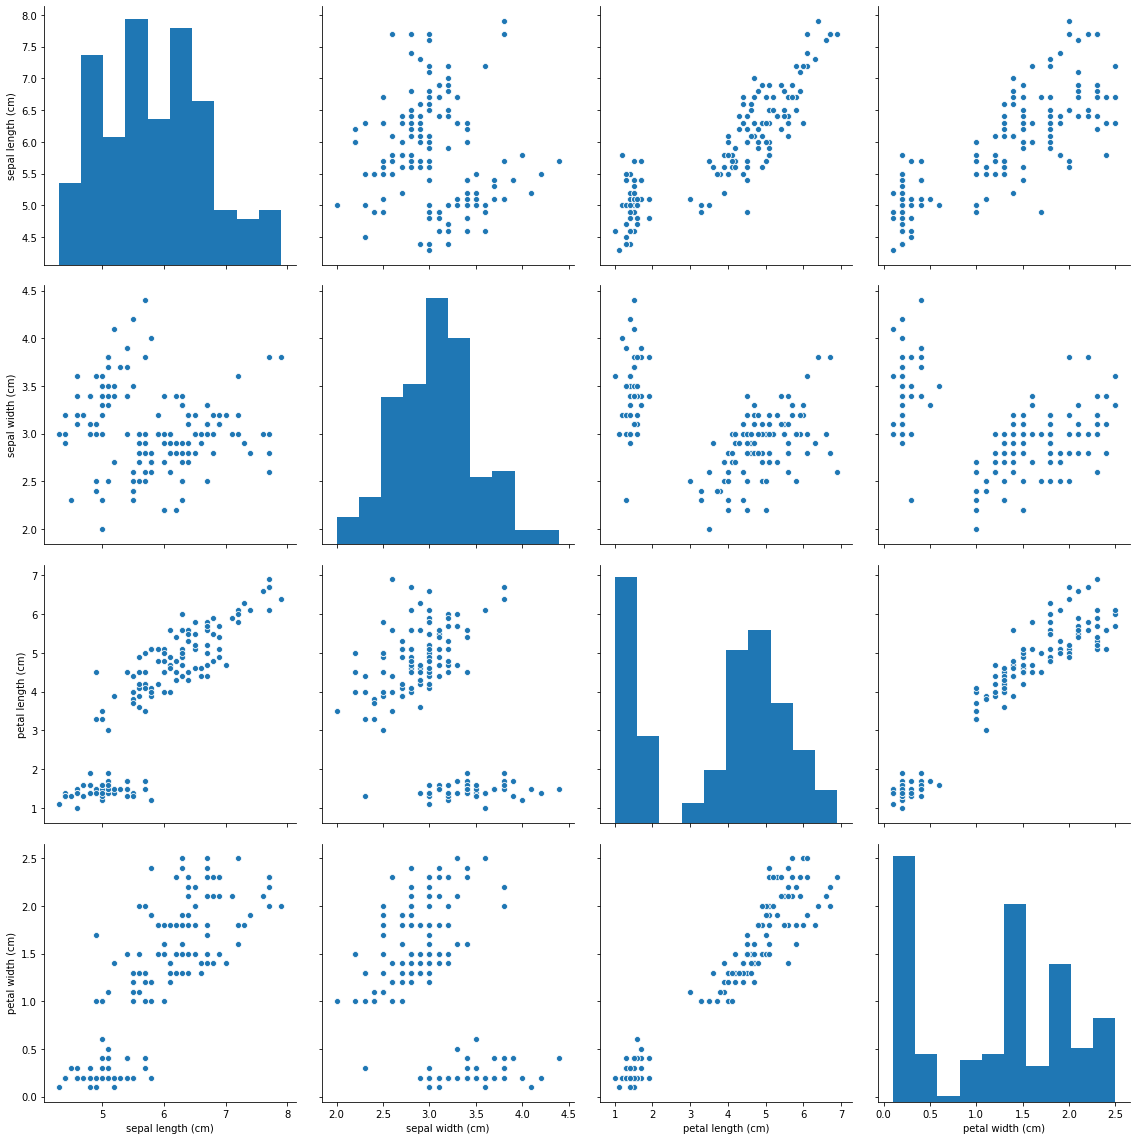

In [29]:
iris_dataset = datasets.load_iris()
X = pd.DataFrame(iris_dataset.data)
X.columns = iris_dataset.feature_names
y = pd.DataFrame(iris_dataset.target, columns=['flower type'])

sns.pairplot(X.loc[:, X.columns != 'flower type'], height=4, aspect=1, kind='scatter')
plt.show()

We see that collinearity is all over the place here. We'll try to figure out now how to resolve this. 

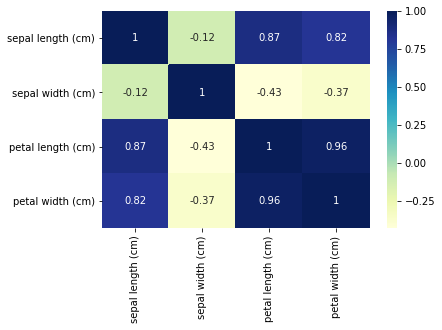

In [30]:
sns.heatmap(X.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [31]:
# Split to Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=105)

# StatsModel
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm).fit()

sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            flower type   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     335.8
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           1.39e-59
Time:                        12:01:32   Log-Likelihood:                 9.5602
No. Observations:                 112   AIC:                            -9.120
Df Residuals:                     107   BIC:                             4.472
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1765      0.248      0.711      0.478      -0.315       0.668
sepal length (cm)    -0.1042      0.067     -1.562      0.121      -0.237       0.028
sepal width (cm)     -0.0403      0.071     -0.565      0.573      -0.182       0.101
petal length (cm)     0.2051      0.068      3.005      0.003       0.070       0.340
petal width (cm)      0.6637      0.119      5.594      0.000       0.428       0.899
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.112
Skew:                           0.021   Prob(JB):                        0.946
Kurtosis:                       3.149   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, index) for index in range(X_train.shape[1])]

vif

,Features,VIF
0,sepal length (cm),247.504197
1,sepal width (cm),92.756571
2,petal length (cm),168.428227
3,petal width (cm),57.194069


R Squared value is quite high, the model is able to explain 92.6% variation in the data with this model. This means that if we just want the model for prediction, we could use this. 
But, since we intend to use the model for inference, we would need to remove the multi collinearity. Seeing the ViF value, Sepal Length could be removed. Let's remove it and check the stats then.

In [33]:
X_train.drop(['sepal length (cm)'], axis=1, inplace=True)

X_train_sm_2 = sm.add_constant(X_train)
sm_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
sm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            flower type   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     441.0
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           2.02e-60
Time:                        12:01:32   Log-Likelihood:                 8.2975
No. Observations:                 112   AIC:                            -8.595
Df Residuals:                     108   BIC:                             2.279
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0199      0.215     -0.093      0.926      -0.447       0.407
sepal width (cm)     -0.1080      0.057     -1.895      0.061      -0.221       0.005
petal length (cm)     0.1315      0.050      2.645      0.009       0.033       0.230
petal width (cm)      0.7231      0.113      6.393      0.000       0.499       0.947
==============================================================================
Omnibus:                        0.934   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.606
Skew:                           0.168   Prob(JB):                        0.739
Kurtosis:                       3.130   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, index) for index in range(X_train.shape[1])]
vif

,Features,VIF
0,sepal width (cm),5.995903
1,petal length (cm),66.078202
2,petal width (cm),45.843628


P values are low now. but checking ViF, the values for petal length and petal width are still quite high. Hence, we need to remove petal length as it has a higher ViF.

In [35]:
X_train.drop(['petal length (cm)'], axis=1, inplace=True)

X_train_sm_3 = sm.add_constant(X_train)
sm_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
sm_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            flower type   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     623.7
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           2.12e-60
Time:                        12:01:32   Log-Likelihood:                 4.7825
No. Observations:                 112   AIC:                            -3.565
Df Residuals:                     109   BIC:                             4.590
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2658      0.191      1.389      0.168      -0.113       0.645
sepal width (cm)    -0.1515      0.056     -2.702      0.008      -0.263      -0.040
petal width (cm)     1.0103      0.033     31.061      0.000       0.946       1.075
==============================================================================
Omnibus:                        6.819   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.439
Skew:                           0.487   Prob(JB):                       0.0400
Kurtosis:                       3.657   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train.values, index) for index in range(X_train.shape[1])]
vif

,Features,VIF
0,sepal width (cm),2.790603
1,petal width (cm),2.790603


Now, ViF is low and p-values are also low. This means that the model variables are significant and not correlated anymore. Hence we could say that only by knowing sepal width and petal width is enough to deduce which flower category it belongs it. 

Let's also check for normality in residual terms. 

Text(0.5, 0, 'Errors')

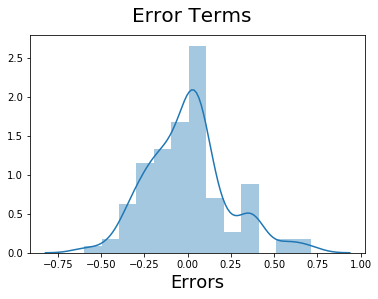

In [51]:
y_train_pred = sm_model_3.predict(X_train_sm_3)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train['flower type'] - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 